# param_estim_4lump.py

Created on Fri Oct 19 15:04:55 2018
@author: Matthew Brooks

This program uses initial data and parameter estimation to solve a system 
differential equations and plot a best fit curve for the conversion of 
VGO into gasoline, gas, and coke. These substances are split into four 
lumps: VGO, gasoline, Gas, and Coke. The yield of each of these lumps is
plotted agianst both the time of the reaction in hours and the percent
conversion. The parameters are estimated using a given table of yields at
different times.

$k_i =$ Rate constant of the reaction

$y_1 =$ Yield of VGO

$y_2 =$ Yield of Gasoline

$y_3 =$ Yield of Gas

$y_4 =$ Yield of Coke

$\frac{dy_1}{dt} = -(k_{12}+k_{13}+k_{14})*y_1^2$

$\frac{dy_2}{dt} = k_{12}*y_1^2-k_{23}*y_2-k_{24}*y_2$

$\frac{dy_3}{dt} = k_{13}*y_1^2+k_{23}*y_2$

$\frac{dy_4}{dt} = k_{14}*y_1^2+k_{24}*y_2$

In [2]:
import numpy as np
from scipy.optimize import curve_fit
from scipy.integrate import odeint
import matplotlib.pyplot as plt

Data used to estimate parameters

In [3]:
# Time
xaxisData = np.array( [0, 1/60, 1/30, 1/20, 1/10] )

# Yield of y_1; y_2; y_3 at given times of xdata
yaxisData = np.array( [ [1, .5074, .3796, .2882, .1762], [0, .3767, .4385, .4865, .5416], [0, .0885, .136, .1681, .2108], [0, .0274, .0459, .0572, .0714]] )

Guesses for parameters

In [4]:
k_12guess = 1;
k_13guess = 1;
k_14guess = 1;
k_23guess = 1;
k_24guess = 1;
parameterGuesses = np.array([k_12guess, k_13guess, k_14guess, k_23guess, k_24guess])

Define system of ODEs

In [5]:
def ODE_definition(y,t,args): 
    y1 = y[0]
    y2 = y[1]
    y3 = y[2]
    y4 = y[3]
    k_12 = args[0]
    k_13 = args[1]
    k_14 = args[2]
    k_23 = args[3]
    k_24 = args[4]
    dy1dt = -(k_12+k_13+k_14)*(y1**2)
    dy2dt = (k_12*(y1**2))-(k_23*y2)-(k_24*y2)
    dy3dt = (k_13*(y1**2))+(k_23*y2)
    dy4dt = (k_14*(y1**2))+(k_24*y2)
    return dy1dt, dy2dt, dy3dt, dy4dt

Define model for system of ODEs to be solved

In [6]:
def ODEmodel(xaxisData,*params):
    
    #Initial conditions for y
    yaxis0 = np.array([1,0,0,0])
    numYaxisVariables = 4 
    yaxisOutput = np.zeros((xaxisData.size,numYaxisVariables))
    for i in np.arange(0,len(xaxisData)):
        xaxisIncrement = 0.0001 
        xaxisSpan = np.arange(0,xaxisData[i]+xaxisIncrement,xaxisIncrement)
        y_calc = odeint(ODE_definition,yaxis0,xaxisSpan,args=(params,))
        yaxisOutput[i,:]=y_calc[-1,:]
    yaxisOutput = np.transpose(yaxisOutput)
    yaxisOutput = np.ravel(yaxisOutput)
    return yaxisOutput

Estimate parameters

In [7]:
parametersoln, pcov = curve_fit(ODEmodel,xaxisData,np.ravel(yaxisData),p0=parameterGuesses)

Plot yield vs time graph

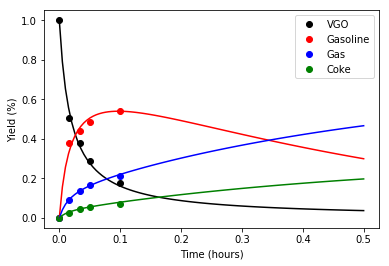

In [8]:
plt.plot(xaxisData, yaxisData[0,:],'ko') 
plt.plot(xaxisData, yaxisData[1,:],'ro')
plt.plot(xaxisData, yaxisData[2,:],'bo')
plt.plot(xaxisData, yaxisData[3,:],'go')
yaxis0 = np.array([1,0,0,0])
numYaxisVariables = 4

xforPlotting = np.linspace(0,xaxisData[-1]+.4,100)
y_calculated = ODEmodel(xforPlotting,*parametersoln)

#reshape for plotting
y_calculated = np.reshape(y_calculated,(numYaxisVariables,xforPlotting.size))
plt.plot(xforPlotting, y_calculated[0,:],'k-') 
plt.plot(xforPlotting, y_calculated[1,:],'r-') 
plt.plot(xforPlotting, y_calculated[2,:],'b-') 
plt.plot(xforPlotting, y_calculated[3,:],'g-') 
plt.xlabel('Time (hours)')
plt.ylabel('Yield (%)')
plt.legend(['VGO','Gasoline','Gas','Coke'])
plt.show()

Figure 1: Graph of the Yield of the substances over time.

Plot yield vs conversion graph

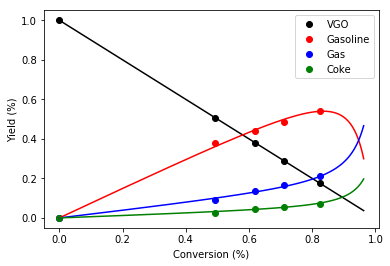

In [9]:
plt.plot(1-yaxisData[0,:], yaxisData[0,:],'ko') 
plt.plot(1-yaxisData[0,:], yaxisData[1,:],'ro')
plt.plot(1-yaxisData[0,:], yaxisData[2,:],'bo')
plt.plot(1-yaxisData[0,:], yaxisData[3,:],'go')


xforPlottingconversion = np.linspace(0,1,100) 
y_calculatedconversion = ODEmodel(xforPlottingconversion,*parametersoln)

#reshape for plotting
y_calculatedconversion = np.reshape(y_calculatedconversion,(numYaxisVariables,xforPlottingconversion.size))
plt.plot(1-y_calculated[0,:], y_calculated[0,:],'k-') 
plt.plot(1-y_calculated[0,:], y_calculated[1,:],'r-') 
plt.plot(1-y_calculated[0,:], y_calculated[2,:],'b-') 
plt.plot(1-y_calculated[0,:], y_calculated[3,:],'g-') 
plt.xlabel('Conversion (%)')
plt.ylabel('Yield (%)')
plt.legend(['VGO','Gasoline','Gas','Coke'])
plt.show()

Figure 2: Graph of the Yield of the substances vs the conversion of VGO

output results

In [10]:
k = np.array(parametersoln)

print('k_12 = ', k[0])
print('k_13 = ', k[1])
print('k_14 = ', k[2])
print('k_23 = ', k[3])
print('k_24 = ', k[4])
print('pcov = ', pcov)

k_12 =  38.98260675054223
k_13 =  9.99906773036063
k_14 =  3.121500217924813
k_23 =  1.3137013072698027
k_24 =  0.6508979934361582
pcov =  [[ 1.80646525 -0.13107161 -0.21754866  0.19390101  0.17362808]
 [-0.13107161  1.14096557 -0.33014749 -0.45325886  0.18966713]
 [-0.21754866 -0.33014749  1.05316731  0.20717238 -0.45539095]
 [ 0.19390101 -0.45325886  0.20717238  0.26620826 -0.12710561]
 [ 0.17362808  0.18966713 -0.45539095 -0.12710561  0.26671949]]
